In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Customers.csv')

In [3]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
167,168,Female,33,86,95
4,5,Female,31,17,40
190,191,Female,34,103,23
176,177,Male,58,88,15
93,94,Female,40,60,40


In [5]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
data = data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


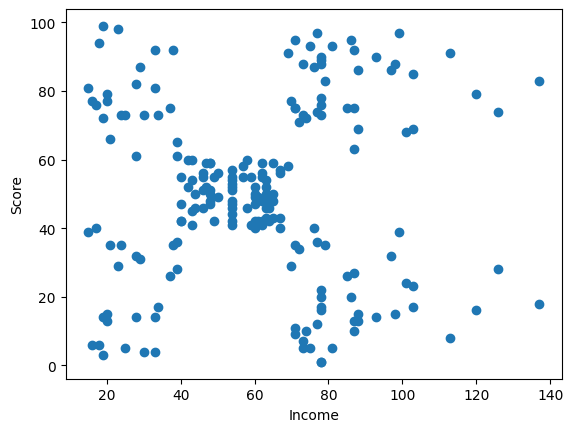

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)
wcss_error


[269981.28,
 186362.95600651758,
 132485.3805668016,
 73679.78903948834,
 66532.58264851091,
 37564.94305477131,
 30241.343617936585,
 28437.45732804018,
 26565.356437665272,
 21664.386170031517]

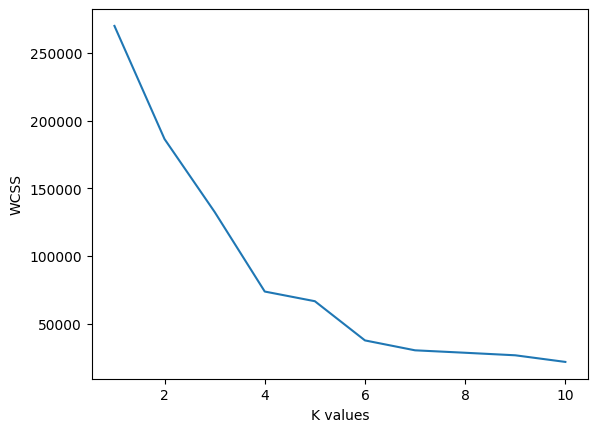

In [9]:
plt.plot(k_values,wcss_error)
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.show()

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])
pred


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [14]:
data['cluster'] = pred
data.head()

,income,score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [16]:
Cluster_0 = data[data['cluster']==0]
Cluster_1 = data[data['cluster']==1]
Cluster_2 = data[data['cluster']==2]
Cluster_3 = data[data['cluster']==3]
Cluster_4 = data[data['cluster']==4]

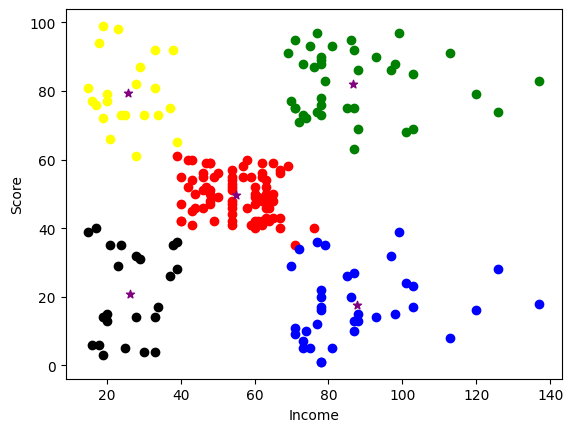

In [19]:
plt.scatter(Cluster_0['income'],Cluster_0['score'],color='red')
plt.scatter(Cluster_1['income'],Cluster_1['score'],color='blue')
plt.scatter(Cluster_2['income'],Cluster_2['score'],color='green')
plt.scatter(Cluster_3['income'],Cluster_3['score'],color='yellow')
plt.scatter(Cluster_4['income'],Cluster_4['score'],color='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [18]:
model.cluster_centers_

array([[55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])